In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
dataset = pd.read_csv("dengue_limpio.csv")
dataset

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_sj,city_iq
0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,True,False
1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,True,False
2,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,True,False
3,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,True,False
4,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,False,True
1452,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,False,True
1453,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,False,True
1454,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,False,True


In [3]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [4]:
dataset.drop("week_start_date", inplace=True, axis=1)

In [5]:
dataset

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_sj,city_iq
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,True,False
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,True,False
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,True,False
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,True,False
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,False,True
1452,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,False,True
1453,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,False,True
1454,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,False,True


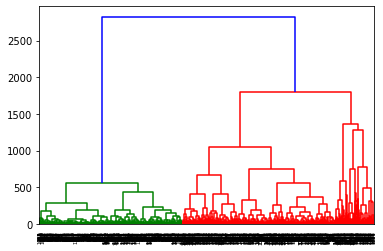

In [6]:
dendrogram = sch.dendrogram(sch.linkage(dataset, method='ward'))

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   1456 non-null   int64  
 1   weekofyear                             1456 non-null   int64  
 2   ndvi_ne                                1456 non-null   float64
 3   ndvi_nw                                1456 non-null   float64
 4   ndvi_se                                1456 non-null   float64
 5   ndvi_sw                                1456 non-null   float64
 6   precipitation_amt_mm                   1456 non-null   float64
 7   reanalysis_air_temp_k                  1456 non-null   float64
 8   reanalysis_avg_temp_k                  1456 non-null   float64
 9   reanalysis_dew_point_temp_k            1456 non-null   float64
 10  reanalysis_max_air_temp_k              1456 non-null   float64
 11  rean

In [8]:
dataset.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_sj,city_iq
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,True,False
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,True,False
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,True,False
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,True,False
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,True,False


In [9]:
data = dataset.values
data

array([[1990, 18, 0.1226, ..., 16.0, True, False],
       [1990, 19, 0.1699, ..., 8.6, True, False],
       [1990, 20, 0.03225, ..., 41.4, True, False],
       ...,
       [2010, 23, 0.2470571, ..., 7.4, False, True],
       [2010, 24, 0.3339143, ..., 16.0, False, True],
       [2010, 25, 0.2981857, ..., 20.4, False, True]], dtype=object)

In [10]:
clustering = sch.linkage(data, 'ward')

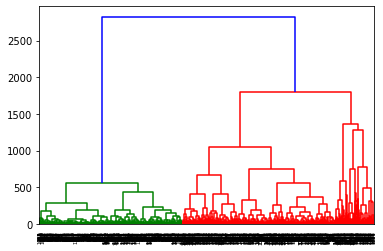

In [11]:
dendrograma = sch.dendrogram(clustering)

In [12]:
clusters = sch.fcluster(clustering, t=2000, criterion='distance')

In [13]:
clusters

array([1, 1, 2, ..., 2, 2, 2], dtype=int32)

In [14]:
set(clusters)

{1, 2}

In [15]:
dataset['clusters_jerarquico'] = clusters
dataset

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_sj,city_iq,clusters_jerarquico
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,True,False,1
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,True,False,1
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,True,False,2
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,True,False,1
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,...,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,False,True,2
1452,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,...,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,False,True,2
1453,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,...,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,False,True,2
1454,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,...,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,False,True,2
